<a href="https://colab.research.google.com/github/Ashis-Palai/Google_Gemini/blob/main/OCR_Gen_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='green'>Data Extraction From Kaggle**

https://www.kaggle.com/datasets/andrewmvd/car-plate-detection/code

In [ ]:
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
with open('kaggle.json') as f:
  with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(json.load(f), file)
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/car-plate-detection
!unzip '/content/car-plate-detection.zip'

# **<font color='red'>Picture Verification**

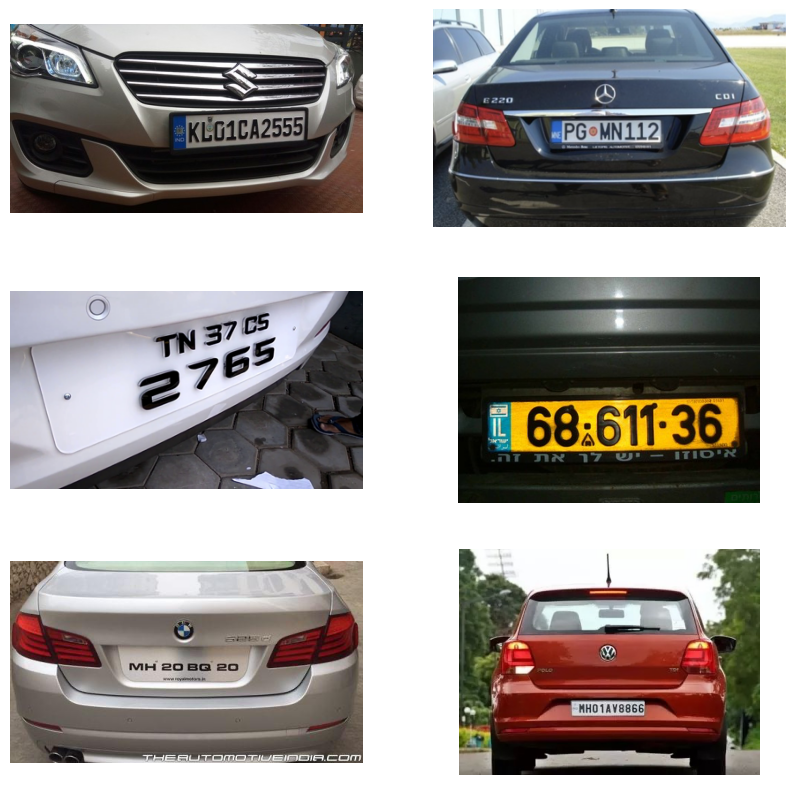

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

# Assuming images is defined as follows
images = glob('/content/images/*')
images.sort()

def show_images(images):
    num_images = len(images)
    num_cols = 2
    num_rows = -(-num_images // num_cols)  # Ceiling division to calculate the number of rows

    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))
    for i, image_path in enumerate(images):
        row, col = divmod(i, num_cols)

        # Read the image using Pillow
        image_pil = Image.open(image_path)

        # Convert to RGB if the image is not in RGB mode
        if image_pil.mode != 'RGB':
            image_pil = image_pil.convert('RGB')

        ax[row, col].imshow(image_pil)
        ax[row, col].axis('off')  # Turn off axis labels and ticks

    plt.show()

show_images(images[:6])


# **<font color='blue'>Model_1 - Google Gemini (Vision)**

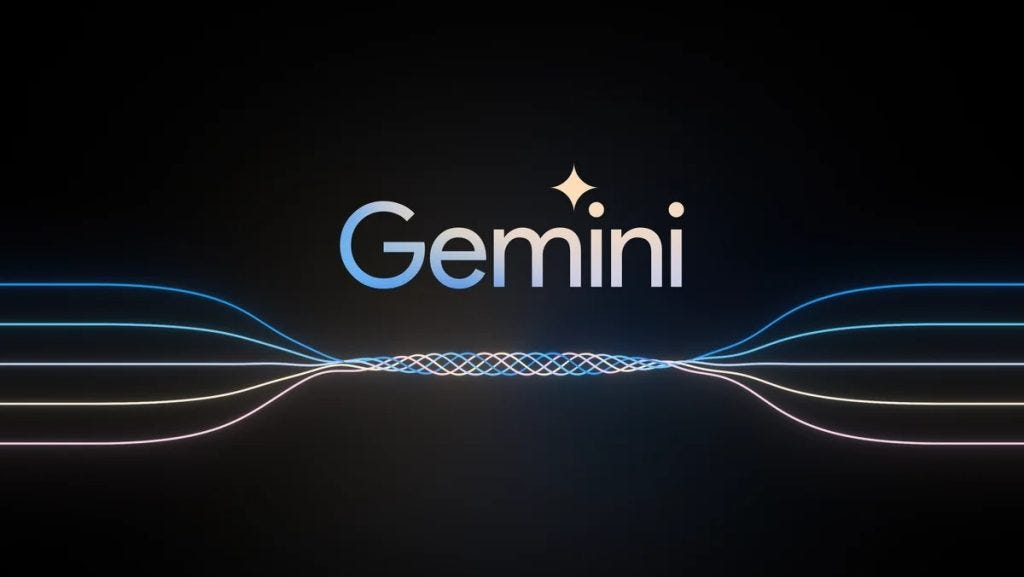

In [ ]:
import google.generativeai as genai
from google.colab import userdata

api_key = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=api_key)

model = genai.GenerativeModel('gemini-pro-vision')

### **<font color='purple'>Prompt: The provided image contains cars with number plates, extract the number from the car's number plate correctly.**

### **Helper function to extract license plate number and show in plot**

In [ ]:
def Gemini_results(images, model):
    num_images = len(images)
    num_cols = 2
    num_rows = -(-num_images // num_cols)  # Ceiling division to calculate the number of rows

    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))
    for i, image_path in enumerate(images):
        row, col = divmod(i, num_cols)

        # Read the image using Pillow
        image_pil = Image.open(image_path)

        # Convert to RGB if the image is not in RGB mode
        if image_pil.mode != 'RGB':
            image_pil = image_pil.convert('RGB')

        ax[row, col].imshow(image_pil)
        ax[row, col].axis('off')  # Turn off axis labels and ticks

        #Gemini output
        prompt = '''The provided image contains cars with number plates, extract the number from the car's number plate correctly.'''
        response = model.generate_content([ prompt, image_pil])
        response.resolve()
        generated_text = response.text.strip()

        ax[row, col].set_title(generated_text)

    plt.show()

# **<font color='red'>Result Verification**

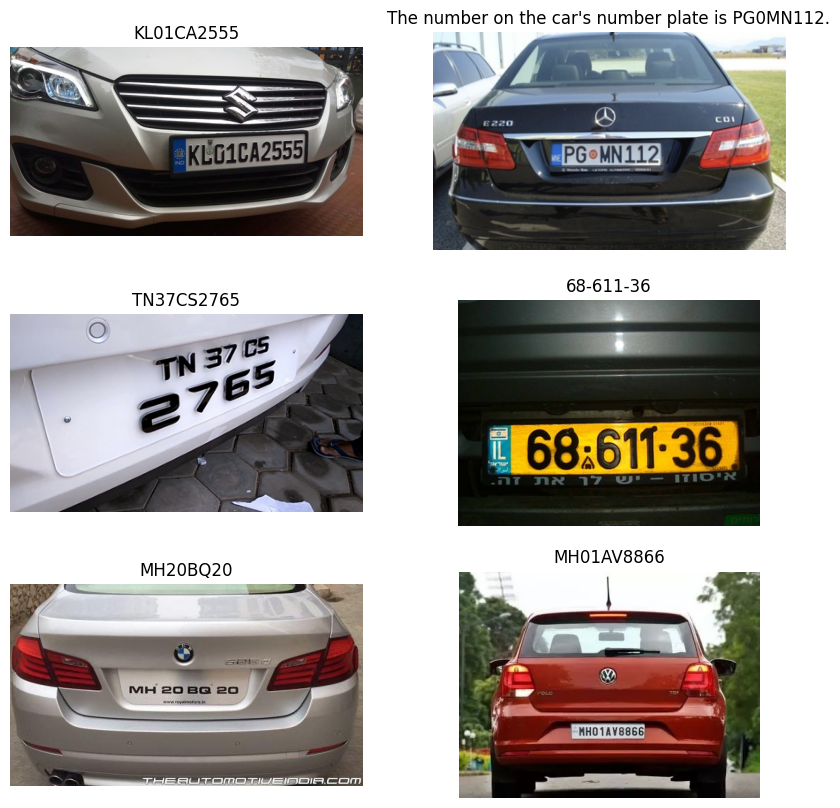

In [ ]:
Gemini_results(images[:6],model)